In [356]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BTC-USD_17.09.2014-25.10.2023.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [357]:
start_date = input("Enter the start date (dd-mm-yy). With the lates 06-04-15: ")
end_date = input("Enter the end date (dd-mm-yy): ")

initial_balance = int(input("Enter the initial balance of trading bot wallet: "))
profit_percent = float(input("Enter the profit in %(minimum value 1.01): "))
balance = initial_balance

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ema_start_date = start_date - pd.Timedelta(days=200)
ema_end_date = end_date - pd.Timedelta(days=200)
initial_ema_start_date = start_date - pd.Timedelta(days=200)

start_date_df_ascending_6month = pd.to_datetime('2020-10-01')
end_date_df_ascending_6month  = pd.to_datetime('2021-04-01')
start_date_df_descending_6month = pd.to_datetime('2021-10-01')
end_date_df_descending_6month  = pd.to_datetime('2022-09-01')
start_date_df_stagnation_6month = pd.to_datetime('2015-11-01')
end_date_df_stagnation_6month  = pd.to_datetime('2016-04-01')
start_date_df_combined_1year = pd.to_datetime('2021-10-01')
end_date_df_combined_1year  = pd.to_datetime('2022-10-01')


In [358]:
ema_filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_ascending_6month)]
ema_filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_descending_6month)]
ema_filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_stagnation_6month)]
ema_filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_combined_1year)]
ema_filtered_df = df[(df['Date'] >= initial_ema_start_date) & (df['Date'] <= end_date)]
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month) & (df['Date'] <= end_date_df_ascending_6month)]
filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month) & (df['Date'] <= end_date_df_descending_6month)]
filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month) & (df['Date'] <= end_date_df_stagnation_6month)]
filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year) & (df['Date'] <= end_date_df_combined_1year)]

filtered_df['Position'] = 0
filtered_df_ascending_6month['Position'] = 0
filtered_df_descending_6month['Position'] = 0
filtered_df_stagnation_6month['Position'] = 0
filtered_df_combined_1year['Position'] = 0


C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3153899763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Position'] = 0
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3153899763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['Position'] = 0
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3153899763.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [359]:
def calculateEmaValues(outputDataSet, inputDataSet):
    ema_lengths = [1, 20, 25, 30, 35, 40, 45, 50, 55, 200]
    ema_values = {}
    for length in ema_lengths:
        ema = inputDataSet['Close'].ewm(span=length, adjust=False).mean()
        ema_values[f'EMA-{length}'] = ema
        outputDataSet[f'EMA-{length}'] = ema

    return ema_values

In [360]:
ema_values_filtered = calculateEmaValues(filtered_df, ema_filtered_df)
print(ema_values_filtered)
ema_values_filtered_asc = calculateEmaValues(filtered_df_ascending_6month, ema_filtered_df_ascending_6month)
ema_values_filtered_dsc = calculateEmaValues(filtered_df_descending_6month, ema_filtered_df_descending_6month)
ema_values_filtered_stg = calculateEmaValues(filtered_df_stagnation_6month, ema_filtered_df_stagnation_6month)
ema_values_filtered_com = calculateEmaValues(filtered_df_combined_1year, ema_filtered_df_combined_1year)

{'EMA-1': 1732     8838.375000
1733     8994.488281
1734     9320.352539
1735     9081.762695
1736     9273.521484
            ...     
2294    27084.808594
2295    27362.437500
2296    28840.953125
2297    29001.720703
2298    29374.152344
Name: Close, Length: 567, dtype: float64, 'EMA-20': 1732     8838.375000
1733     8853.242932
1734     8897.729561
1735     8915.256526
1736     8949.376998
            ...     
2294    22952.121996
2295    23372.152044
2296    23892.990242
2297    24379.536001
2298    24855.213748
Name: Close, Length: 567, dtype: float64, 'EMA-25': 1732     8838.375000
1733     8850.383714
1734     8886.535162
1735     8901.552665
1736     8930.165651
            ...     
2294    22316.475539
2295    22704.626459
2296    23176.651587
2297    23624.733827
2298    24066.996790
Name: Close, Length: 567, dtype: float64, 'EMA-30': 1732     8838.375000
1733     8848.446825
1734     8878.892355
1735     8891.980764
1736     8916.596294
            ...     
2294    21758.6

C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3638760661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outputDataSet[f'EMA-{length}'] = ema
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3638760661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outputDataSet[f'EMA-{length}'] = ema
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3638760661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [361]:
def calculate_rsi(dataSet, period=14):
    delta = dataSet['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [362]:
filtered_df['RSI'] = calculate_rsi(df)
filtered_df_ascending_6month['RSI'] = calculate_rsi(df)
filtered_df_descending_6month['RSI'] = calculate_rsi(df)
filtered_df_stagnation_6month['RSI'] = calculate_rsi(df)
filtered_df_combined_1year['RSI'] = calculate_rsi(df)


C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\2572384117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RSI'] = calculate_rsi(df)
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\2572384117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['RSI'] = calculate_rsi(df)
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\2572384117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [363]:
def checkMarketTrend(dataSet):
    dataSet['Trend'] = dataSet[['EMA-20', 'EMA-25', 'EMA-30', 'EMA-35', 'EMA-40', 'EMA-45', 'EMA-50', 'EMA-55']].apply(lambda x: all(x[i] > x[i+1] for i in range(len(x)-1)), axis=1).astype(int)

In [364]:
checkMarketTrend(filtered_df)
checkMarketTrend(filtered_df_ascending_6month)
checkMarketTrend(filtered_df_descending_6month)
checkMarketTrend(filtered_df_stagnation_6month)
checkMarketTrend(filtered_df_combined_1year)

C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3138662830.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataSet['Trend'] = dataSet[['EMA-20', 'EMA-25', 'EMA-30', 'EMA-35', 'EMA-40', 'EMA-45', 'EMA-50', 'EMA-55']].apply(lambda x: all(x[i] > x[i+1] for i in range(len(x)-1)), axis=1).astype(int)
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3138662830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Trend'] = dataSet[['EMA-20', 'EMA-25', 'EMA-30', 'EMA-35', 'EMA-40', 'EMA-45', 'EMA-50', 'EMA-55']].apply(lambda x: all(x[i] > x[i+1] for i in 

In [365]:
def printInputChart(ema_values, dataSet):
    for length, color in zip(ema_values.keys(),
                             ['#013220', '#f5eb5d', '#f5b771', '#f5b056', '#f57b4e', '#f56d58', '#f57d51', '#f55151', '#aa2707', '#00008B']):
        plt.plot(dataSet['Date'], ema_values[length][200:], label=length, color=color, linewidth=2)

    plt.xlabel('Date')
    plt.ylabel('EMA Values')
    plt.title('EMA Ribbon')
    plt.legend(['Price', 'EMA-20', 'EMA-25', 'EMA-30', 'EMA-35', 'EMA-40', 'EMA-45', 'EMA-50', 'EMA-55', 'EMA-200'])
    plt.grid(True)

    plt.show()

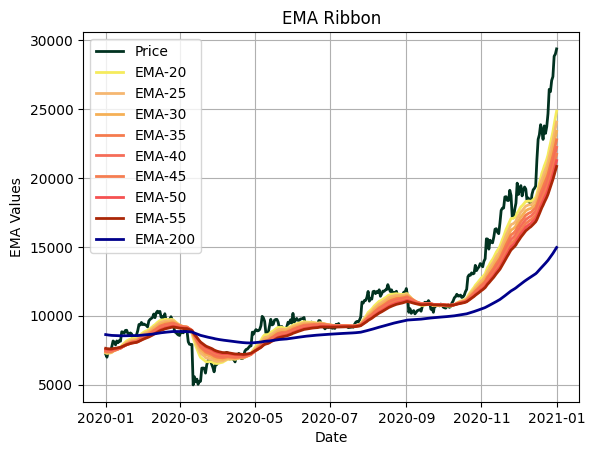

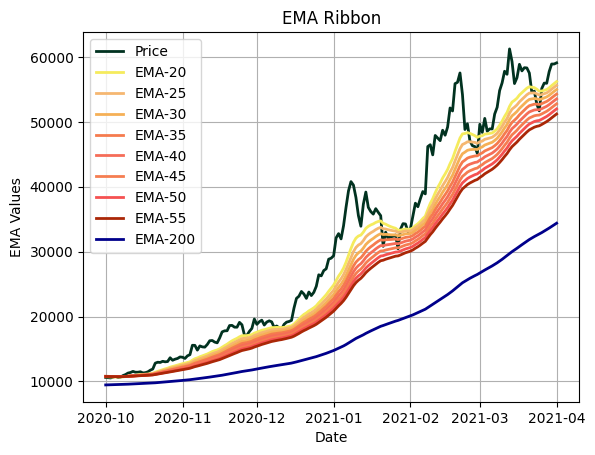

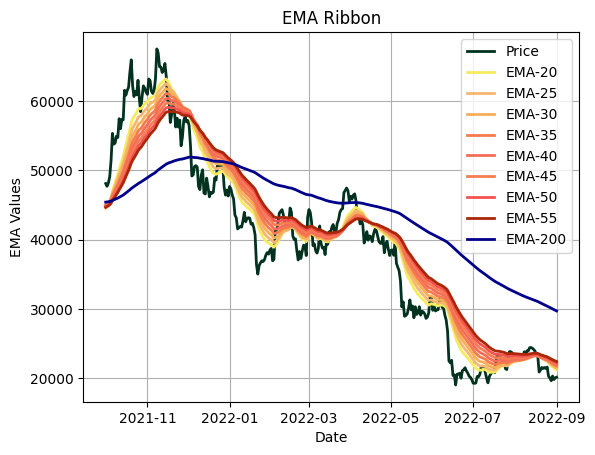

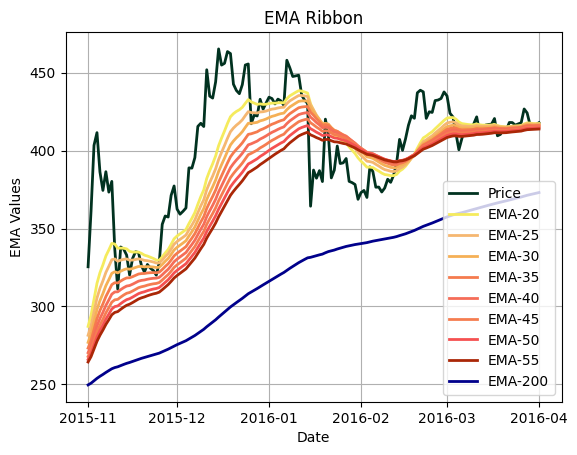

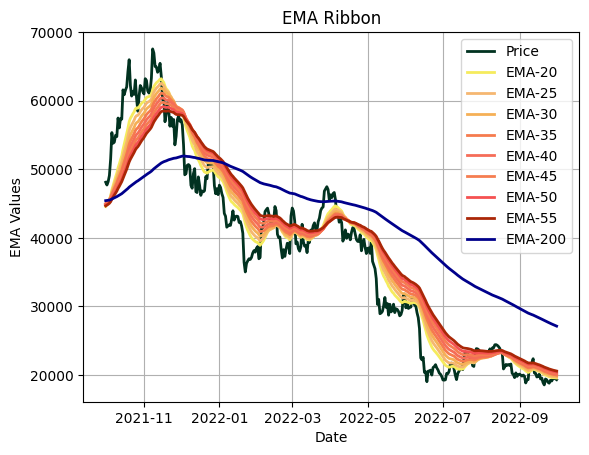

In [366]:
printInputChart(ema_values_filtered, filtered_df)
printInputChart(ema_values_filtered_asc, filtered_df_ascending_6month)
printInputChart(ema_values_filtered_dsc, filtered_df_descending_6month)
printInputChart(ema_values_filtered_stg, filtered_df_stagnation_6month)
printInputChart(ema_values_filtered_com, filtered_df_combined_1year)

In [367]:
#BUY SIGNAL
    #close price above 200 EMA
    #Ribbon also above 200 EMAto ribbon without closing below 200 EMA
    #RSI must be oversold
def generate_signal(row, pullback_period=7):
    ema_lengths = [20, 25, 30, 35, 40, 45, 50, 55]
    # Buy Signal Conditions
    # print(row['Close'])
    # print(row['EMA-200'])
    buy_condition_1 = row['Close'] > row['EMA-200']
    # print('condition 1: ', buy_condition_1)
    buy_condition_2 = all(row[f'EMA-{i}'] > row['EMA-200'] for i in ema_lengths)

    buy_condition_3 = all(row['RSI'] <= 40 for _ in range(pullback_period+7))  # RSI oversold condition
    # print('condition 3: ', buy_condition_3)
    # Short Signal Conditions (opposite of Buy Signal)
    short_condition_1 = row['Close'] < row['EMA-200']
    short_condition_2 = all(row[f'EMA-{i}'] < row['EMA-200'] for i in ema_lengths)
    short_condition_3 = all(row['RSI'] >= 60 for _ in range(pullback_period+7))  # RSI overbought condition

    # Ribbon pullback condition
    ribbon_pullback_condition_long = all(row[f'EMA-{i}'] > row['EMA-200'] for i in ema_lengths)

    ribbon_pullback_condition_short = all(row[f'EMA-{i}'] < row['EMA-200'] for i in ema_lengths)

    # Check Buy Signal
    if buy_condition_1 and buy_condition_2 and ribbon_pullback_condition_long:
        return 1

    # Check Short Signal
    elif short_condition_1 and short_condition_2 and ribbon_pullback_condition_short:
        return 0

    # No Signal
    else:
        return 2


In [368]:
filtered_df['Signal'] = filtered_df.apply(generate_signal, axis=1)
filtered_df_ascending_6month['Signal'] = filtered_df_ascending_6month.apply(generate_signal, axis=1)
filtered_df_descending_6month['Signal'] = filtered_df_descending_6month.apply(generate_signal, axis=1)
filtered_df_stagnation_6month['Signal'] = filtered_df_stagnation_6month.apply(generate_signal, axis=1)
filtered_df_combined_1year['Signal'] = filtered_df_combined_1year.apply(generate_signal, axis=1)

C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3036877363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Signal'] = filtered_df.apply(generate_signal, axis=1)
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3036877363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['Signal'] = filtered_df_ascending_6month.apply(generate_signal, axis=1)
C:\Users\Palko\AppData\Local\Temp\ipykernel_17444\3036877363.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [369]:
filtered_df_output = pd.DataFrame(filtered_df)
filtered_df_output_asc = pd.DataFrame(filtered_df_ascending_6month)
filtered_df_output_dsc = pd.DataFrame(filtered_df_descending_6month)
filtered_df_output_stg = pd.DataFrame(filtered_df_stagnation_6month)
filtered_df_output_com = pd.DataFrame(filtered_df_combined_1year)

filtered_df_output.to_csv('trading_bot_3_filtered_output.csv', index=False)
filtered_df_output_asc.to_csv('trading_bot_3_filtered_output_asc.csv', index=False)
filtered_df_output_dsc.to_csv('trading_bot_3_filtered_output_dsc.csv', index=False)
filtered_df_output_stg.to_csv('trading_bot_3_filtered_output_stg.csv', index=False)
filtered_df_output_com.to_csv('trading_bot_3_filtered_output_com.csv', index=False)

In [370]:
def trading_bot_3(balance, data, mode, fee, profit_percent):
    trades = []
    holding = 0
    last_buy_balance = 0
    mode = ''

    for index, row in data.iterrows():
        date = row['Date']
        close_price = row['Close']

        if holding == 0:
            if row['Signal'] == 1:
                # Long position
                if holding == 0:
                    buy_price = close_price
                    real_balance = balance - (fee / balance) * 100
                    last_buy_balance = real_balance
                    holding = real_balance / buy_price
                    mode = 'Long'
                    trades.append([mode, date, buy_price, holding, real_balance, 0, 0])

            elif row['Signal'] == 2:
                # Short position
                if holding > 0:
                    balance = holding * close_price - fee
                    holding = 0
                    profit_to_initial_balance = balance - initial_balance / initial_balance * 100
                    mode = 'Short'
                    trades.append([mode, date, close_price, holding, balance, 0, profit_to_initial_balance])

        if holding > 0:
            current_value = holding * close_price
            profit = (current_value - last_buy_balance) / last_buy_balance * 100

            if profit >= profit_percent:
                balance = current_value - fee
                holding = 0
                last_buy_balance = current_value
                profit_to_initial_balance = balance - initial_balance / initial_balance * 100
                if mode == 'Long':
                    trades.append(['Sell', date, close_price, holding, balance, profit, profit_to_initial_balance])
                else:
                    trades.append(['Buy', date, close_price, holding, balance-profit_percent, profit, profit_to_initial_balance])

            else:
                trades.append(['Hold', date, close_price, holding, current_value, profit, 0])

    final_balance = trades[-1][-3]
    return final_balance, trades

In [371]:
print(f"Initial Balance: ${initial_balance}")

final_balance_tb1, trades_asc = trading_bot_3(balance, filtered_df_ascending_6month, 'ASC', 2, profit_percent)
print(f"Final Balance ASC_6M: ${final_balance_tb1}")
trades_df = pd.DataFrame(trades_asc, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesASC_bot_3.csv', index=False)

final_balance_tb2, trades_dsc = trading_bot_3(balance, filtered_df_descending_6month, 'DSC', 2, profit_percent)
print(f"Final Balance DSC_6M: ${final_balance_tb2}")
trades_df = pd.DataFrame(trades_dsc, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesDSC_bot_3.csv', index=False)

final_balance_tb3, trades_stg = trading_bot_3(balance, filtered_df_stagnation_6month, 'STG', 2, profit_percent)
print(f"Final Balance STG_6M: ${final_balance_tb3}")
trades_df = pd.DataFrame(trades_stg, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesSTG_bot_3.csv', index=False)

final_balance_tb4, trades_com = trading_bot_3(balance, filtered_df_combined_1year, 'COM', 2, profit_percent)
print(f"Final Balance COM_1Y: ${final_balance_tb4}")
trades_df = pd.DataFrame(trades_com, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesCOM_bot_3.csv', index=False)

Initial Balance: $100
Final Balance ASC_6M: $434.57523044372147
Final Balance DSC_6M: $34.19236441456233
Final Balance STG_6M: $119.64193203037006
Final Balance COM_1Y: $32.80775079723374


In [372]:
df_asc = pd.read_csv('tradesASC_bot_3.csv')
df_dsc = pd.read_csv('tradesDSC_bot_3.csv')
df_stg = pd.read_csv('tradesSTG_bot_3.csv')
df_com = pd.read_csv('tradesCOM_bot_3.csv')

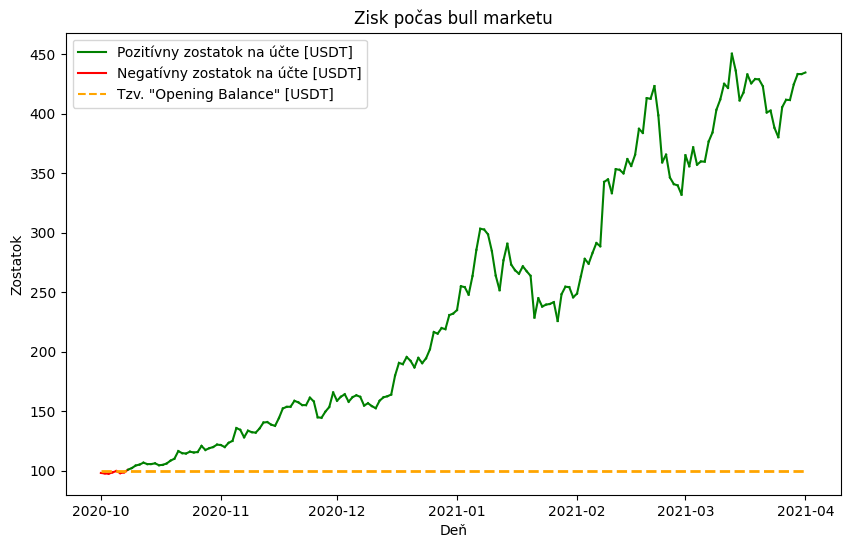

In [373]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
for i in range(1, len(df_asc['Date'])):
    if df_asc['Balance'][i-1] >= initial_balance and df_asc['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_asc['Date'][i-1]), pd.to_datetime(df_asc['Date'][i])],
                 [df_asc['Balance'][i-1], df_asc['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_asc['Date'][i-1]), pd.to_datetime(df_asc['Date'][i])],
                 [df_asc['Balance'][i-1], df_asc['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_asc['Date'][0]), pd.to_datetime(df_asc['Date'][len(df_asc['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bull marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.show()

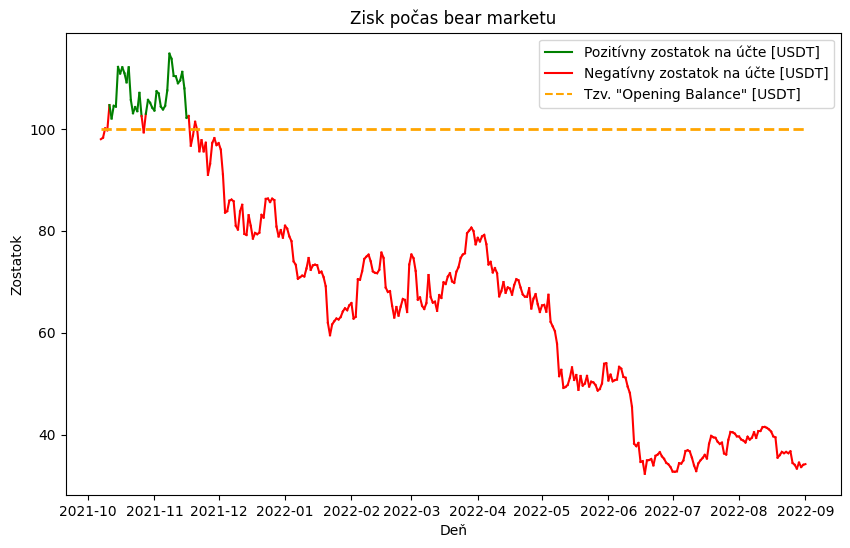

In [374]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_dsc['Date'])):
    if df_dsc['Balance'][i-1] >= initial_balance and df_dsc['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_dsc['Date'][i-1]), pd.to_datetime(df_dsc['Date'][i])],
                 [df_dsc['Balance'][i-1], df_dsc['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_dsc['Date'][i-1]), pd.to_datetime(df_dsc['Date'][i])],
                 [df_dsc['Balance'][i-1], df_dsc['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_dsc['Date'][0]), pd.to_datetime(df_dsc['Date'][len(df_dsc['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bear marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok')

plt.show()

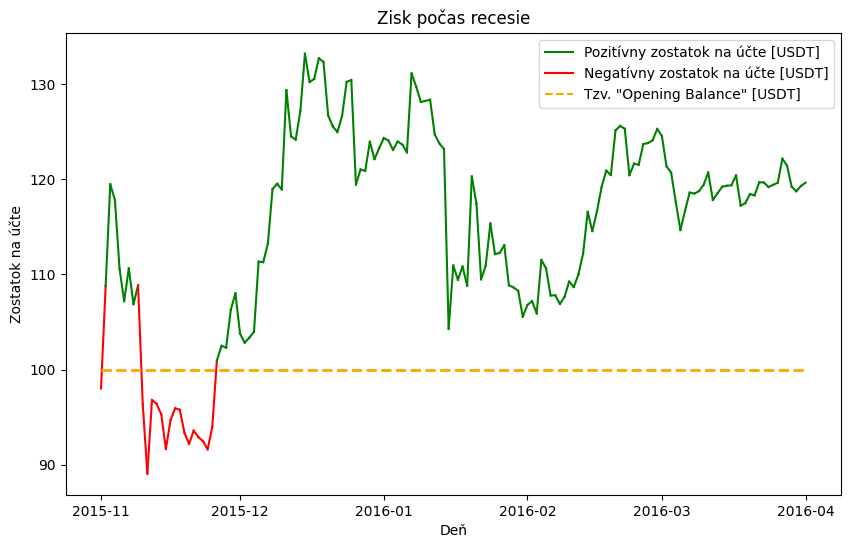

In [375]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_stg['Date'])):
    if df_stg['Balance'][i-1] >= initial_balance and df_stg['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_stg['Date'][i-1]), pd.to_datetime(df_stg['Date'][i])],
                 [df_stg['Balance'][i-1], df_stg['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_stg['Date'][i-1]), pd.to_datetime(df_stg['Date'][i])],
                 [df_stg['Balance'][i-1], df_stg['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_stg['Date'][0]), pd.to_datetime(df_stg['Date'][len(df_stg['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas recesie')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte')
plt.show()

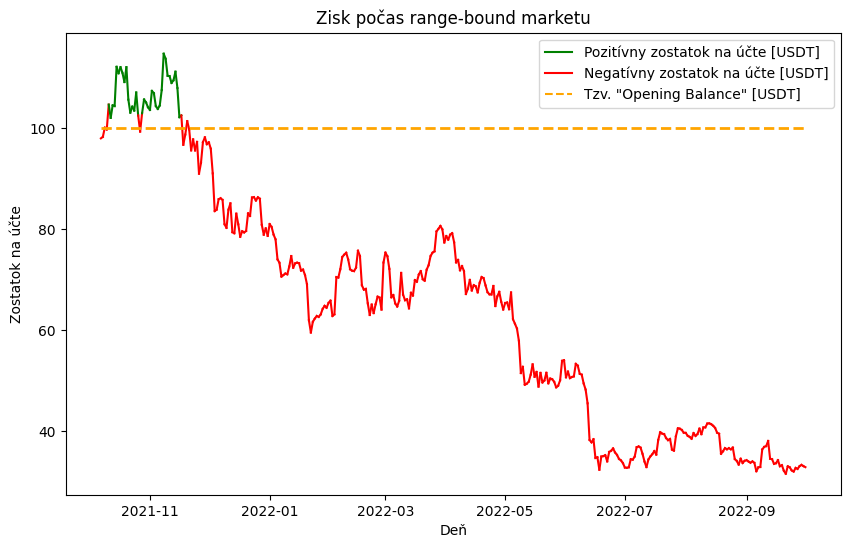

In [376]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_com['Date'])):
    if df_com['Balance'][i-1] >= initial_balance and df_com['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_com['Date'][i-1]), pd.to_datetime(df_com['Date'][i])],
                 [df_com['Balance'][i-1], df_com['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_com['Date'][i-1]), pd.to_datetime(df_com['Date'][i])],
                 [df_com['Balance'][i-1], df_com['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_com['Date'][0]), pd.to_datetime(df_com['Date'][len(df_com['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas range-bound marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte')
plt.show()

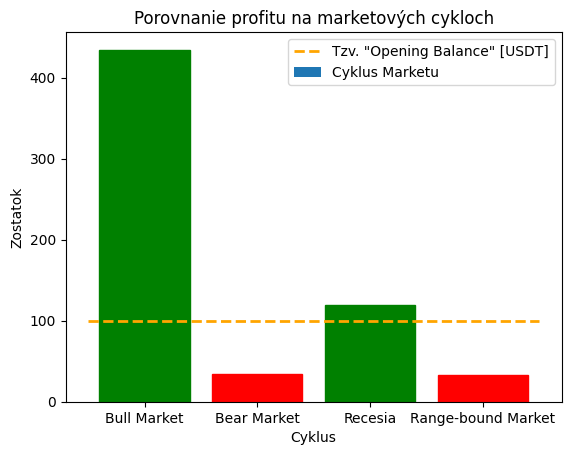

In [377]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [final_balance_tb1, final_balance_tb2, final_balance_tb3, final_balance_tb4]

bars = plt.bar(x_pos,y_pos)
plt.plot([-0.5, len(x_pos)-0.5], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2)
plt.legend(['Tzv. "Opening Balance" [USDT]', 'Cyklus Marketu'])
plt.title('Porovnanie profitu na marketových cykloch')
plt.xlabel('Cyklus')
plt.ylabel('Zostatok')

for i in range(len(bars)):
    if initial_balance > y_pos[i]:
        bars[i].set_color('red')
    else:
        bars[i].set_color('green')

Mode
Hold    174
Long     10
Sell      9
Name: count, dtype: int64


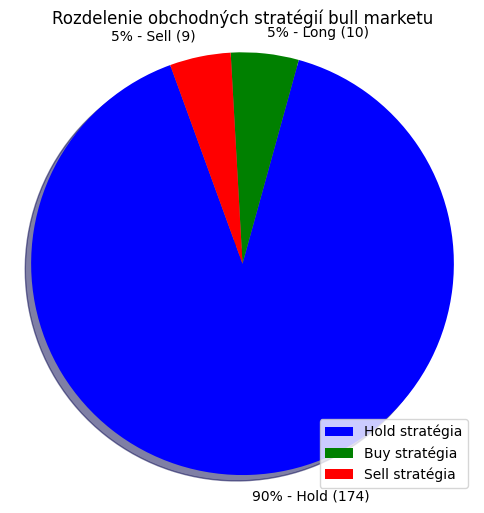

In [378]:
mode_counts = df_asc['Mode'].value_counts()
print(mode_counts)
plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_asc) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'],shadow=True, startangle=110)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower right')
plt.title('Rozdelenie obchodných stratégií bull marketu')
plt.axis('equal')

plt.show()

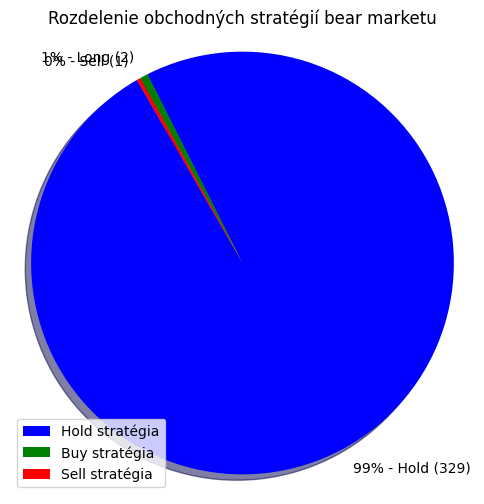

In [379]:
mode_counts = df_dsc['Mode'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_dsc) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'], shadow=True, startangle=120)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower left')
plt.title('Rozdelenie obchodných stratégií bear marketu')
plt.axis('equal')

plt.show()

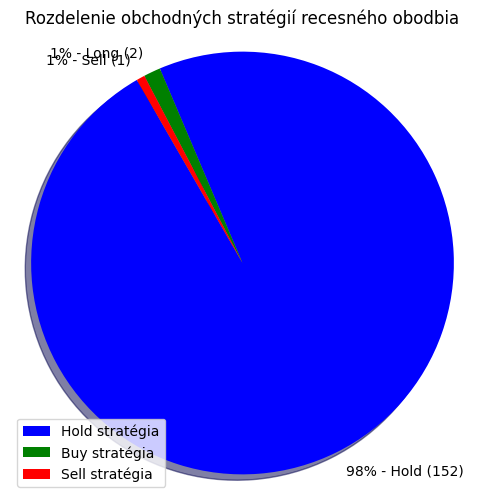

In [380]:
mode_counts = df_stg['Mode'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_stg) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'], shadow=True, startangle=120)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower left')
plt.title('Rozdelenie obchodných stratégií recesného obodbia')
plt.axis('equal')

plt.show()

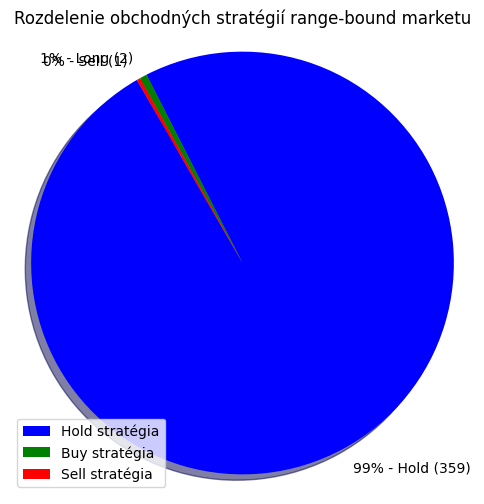

In [381]:
mode_counts = df_com['Mode'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_com) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'], shadow=True, startangle=120)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower left')
plt.title('Rozdelenie obchodných stratégií range-bound marketu')
plt.axis('equal')

plt.show()

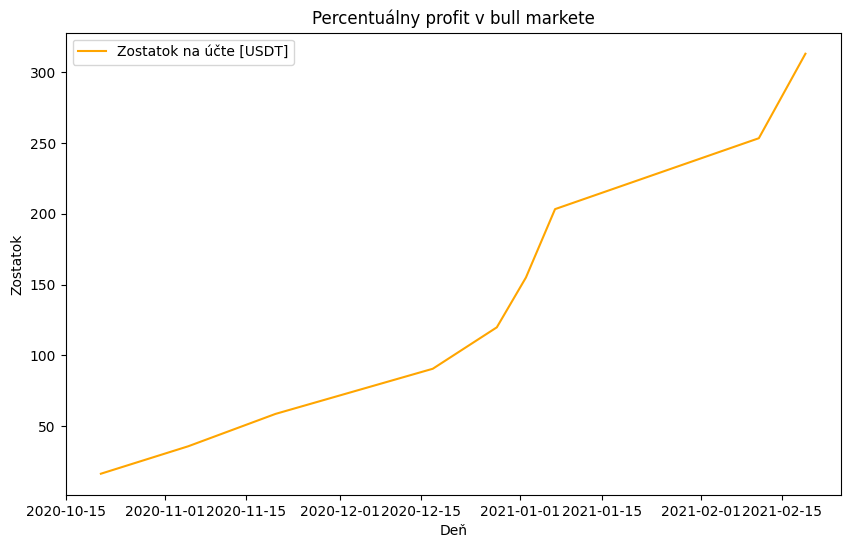

In [382]:
df_asc_filtered = df_asc[df_asc['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_asc_filtered['Date']), df_asc_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v bull markete')
plt.show()

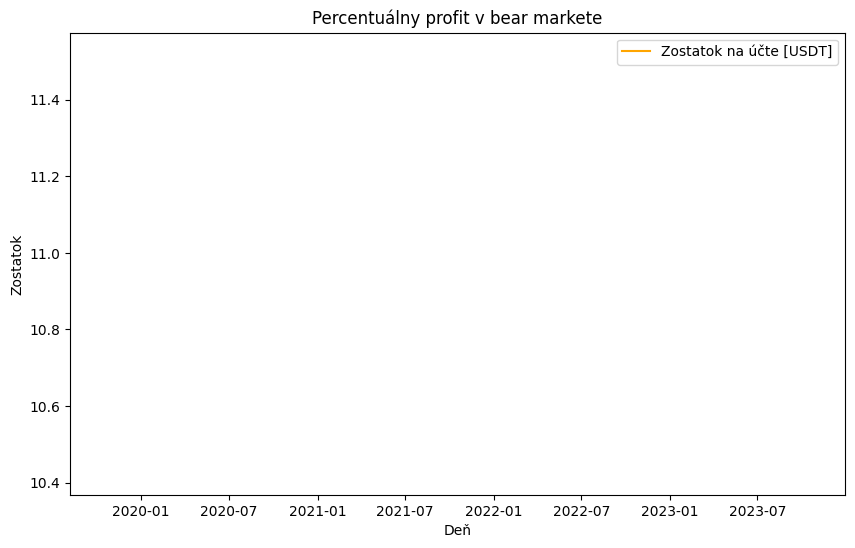

In [383]:
df_dsc_filtered = df_dsc[df_dsc['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_dsc_filtered['Date']), df_dsc_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v bear markete')
plt.show()

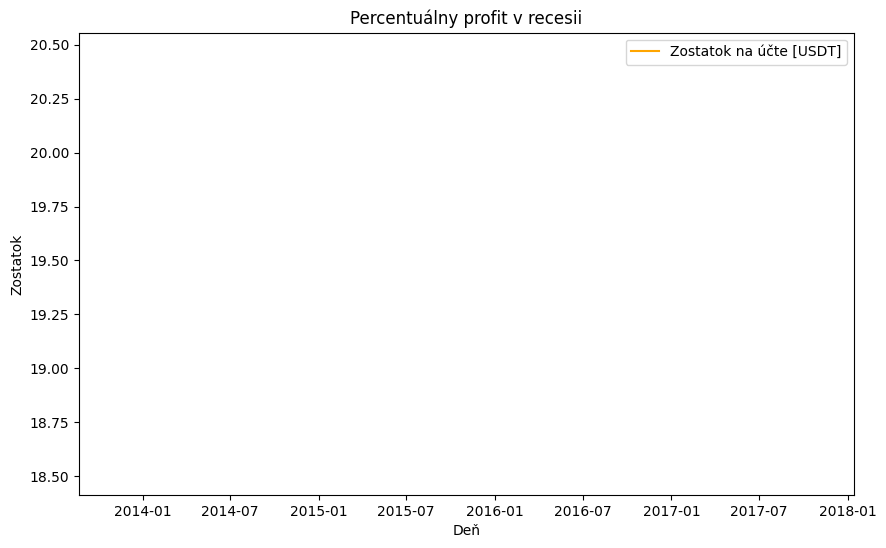

In [384]:
df_stg_filtered = df_stg[df_stg['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_stg_filtered['Date']), df_stg_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v recesii')
plt.show()

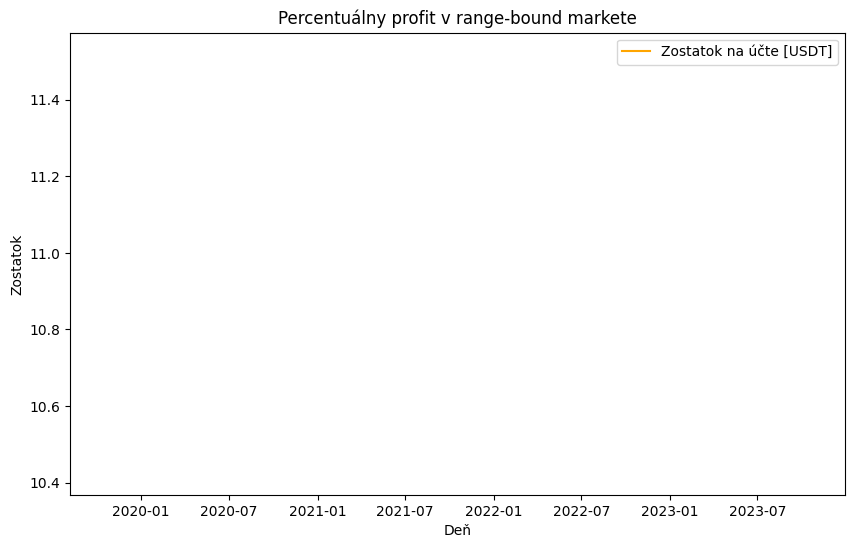

In [385]:
df_com_filtered = df_com[df_com['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_com_filtered['Date']), df_com_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v range-bound markete')
plt.show()

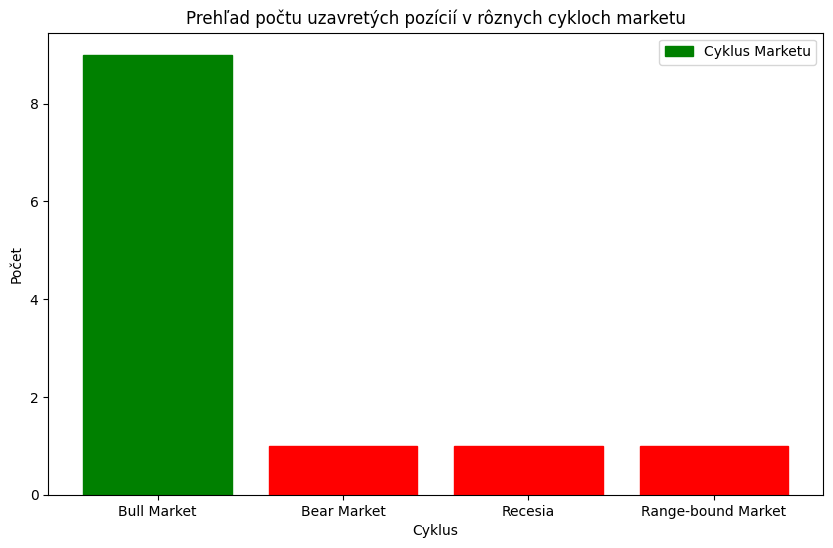

In [386]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc_filtered), len(df_dsc_filtered), len(df_stg_filtered), len(df_com_filtered)]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['red' if i != max_count_index else 'green' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet')

plt.show()